In [10]:
import os

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import ROOT as rt
from ROOT import RDataFrame
from ROOT import (TCanvas, TLatex, TLegend, TH1D, TH2D, TGraph, TGraphErrors)

GC = []

################################
################################

DATA_PATH = '/home/cptlab/qaqc-gui_output/scan2'
fns = os.listdir(DATA_PATH)
scan_dict = []

for fn in fns:
    if '_RDF.root' not in fn:
        continue

    fn_split = fn.rstrip('.root').split('_')
    scan_dict.append({
        'rdf_spe1' : RDataFrame('spe_TriggerGroup1', f'{DATA_PATH}/{fn}'),
        'rdf_spe2' : RDataFrame('spe_TriggerGroup2', f'{DATA_PATH}/{fn}'),
        'rdf_spe3' : RDataFrame('spe_TriggerGroup3', f'{DATA_PATH}/{fn}'),
        'rdf_spe4' : RDataFrame('spe_TriggerGroup4', f'{DATA_PATH}/{fn}'),
        'rdf_src1' : RDataFrame('sodium_TriggerGroup1', f'{DATA_PATH}/{fn}'),
        'rdf_src2' : RDataFrame('sodium_TriggerGroup2', f'{DATA_PATH}/{fn}'),
        'rdf_src3' : RDataFrame('sodium_TriggerGroup3', f'{DATA_PATH}/{fn}'),
        'rdf_src4' : RDataFrame('sodium_TriggerGroup4', f'{DATA_PATH}/{fn}'),
        'ov' : float(fn_split[2][3:]),
        'tt' : -1*float(fn_split[3][3:]),
        'nspe' : int(fn_split[4][4:]),
        'nsrc' : int(fn_split[5][7:]),
    })

print(f'Loaded {len(scan_dict):,} OV/TT combinations')


Loaded 176 OV/TT combinations


In [13]:
def create_tgraph(x, y, title=None, xl=None, yl=None, **kwargs):
    global GC

    # Set correct dtype and check shapes
    x, y = np.asarray(x)*1., np.asarray(y)*1.
    assert x.shape == y.shape

    xe = kwargs['xe'] if 'xe' in kwargs else x*0
    ye = kwargs['ye'] if 'ye' in kwargs else y*0
    xe, ye = np.asarray(xe)*1., np.asarray(ye)*1.
    assert (x.shape == xe.shape) and (y.shape == ye.shape)
    assert (xe.shape == ye.shape)

    # TGraph Draw Options
    kw = {
        'alpha' : XXX,
        'c' : rt.kBlack,
        #
        'ls' : rt.kSolid,
        'lw' : 2,
        #
        'ms' : None, # None, o, O, x, X, +, ++
        'mw' : None,
        'mc' : None,
        #
        'es' : None,
        'ew' : None,
        'ef' : None, # use float for fill alpha
        
    } | kwargs

    gr = TGraph(len(x), x, y, xe, ye)
    return gr

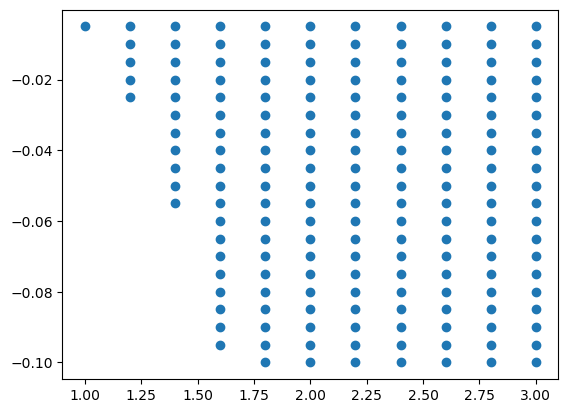

In [12]:
ov_tt = np.array([[s['ov'], s['tt']] for s in scan_dict])

plt.scatter(ov_tt[:,0], ov_tt[:,1])